# 1. Mount Google Drive

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
!ls -la "/content/drive/My Drive/darknet"

total 580
drwx------ 2 root root   4096 Jun  8 04:27 backup
drwx------ 2 root root   4096 Jun  8 04:27 bin
drwx------ 2 root root   4096 Jun  8 04:27 cuDNN
drwx------ 2 root root   4096 Jun  8 04:27 custom
-rw------- 1 root root 567099 Jun  8 06:00 FruitCustomYolo.ipynb
drwx------ 2 root root   4096 Jun  8 04:27 .ipynb_checkpoints
drwx------ 2 root root   4096 Jun  8 04:27 weights
-rw------- 1 root root   1686 Jun  5 13:14 yolo_colab_label_data_generation.py


In [3]:
!ls -la /usr/local/cuda/include/cudnn.h

ls: cannot access '/usr/local/cuda/include/cudnn.h': No such file or directory


# 2. Install CUDA related modules, cuDNN

Unzip the cuDNN from Google Drive to Colab /usr/local/cuda folder

In [5]:
!tar -xzvf /content/drive/My\ Drive/darknet/cuDNN/cudnn-10.1-linux-x64-v7.6.5.32.tgz -C /usr/local/
!chmod a+r /usr/local/cuda/include/cudnn.h

!cat /usr/local/cuda/include/cudnn.h | grep CUDNN_MAJOR -A 2

cuda/include/cudnn.h
cuda/NVIDIA_SLA_cuDNN_Support.txt
cuda/lib64/libcudnn.so
cuda/lib64/libcudnn.so.7
cuda/lib64/libcudnn.so.7.6.5
cuda/lib64/libcudnn_static.a
#define CUDNN_MAJOR 7
#define CUDNN_MINOR 6
#define CUDNN_PATCHLEVEL 5
--
#define CUDNN_VERSION (CUDNN_MAJOR * 1000 + CUDNN_MINOR * 100 + CUDNN_PATCHLEVEL)

#include "driver_types.h"


## 3. Load DarkNet

In [6]:
import os
if not os.path.exists('darknet'):
    os.makedirs('darknet')
%cd darknet
%ls

/content/darknet


In [7]:
!ls -la '/content/drive/My Drive/darknet/bin/darknet'

!cp /content/drive/My\ Drive/darknet/bin/darknet ./darknet

!chmod +x ./darknet

-rw------- 1 root root 3213624 Apr 19  2020 '/content/drive/My Drive/darknet/bin/darknet'


# 4. Test Yolo

In [8]:
def imShow(path):
  import cv2
  import matplotlib.pyplot as plt
  %matplotlib inline

  image = cv2.imread(path)
  height, width = image.shape[:2]
  resized_image = cv2.resize(image,(3*width, 3*height), interpolation = cv2.INTER_CUBIC)

  fig = plt.gcf()
  fig.set_size_inches(18, 10)
  plt.axis("off")
  #plt.rcParams['figure.figsize'] = [10, 5]
  plt.imshow(cv2.cvtColor(resized_image, cv2.COLOR_BGR2RGB))
  plt.show()
  
  
def upload():
  from google.colab import files
  uploaded = files.upload() 
  for name, data in uploaded.items():
    with open(name, 'wb') as f:
      f.write(data)
      print ('saved file', name)
def download(path):
  from google.colab import files
  files.download(path)

# 5. Custom Yolo

In [10]:
!cp -r "/content/drive/My Drive/darknet/custom" .

In [9]:
!./darknet partial custom/strawberry_yolotiny.cfg custom/strawberry_yolotiny.weights strawberry_yolotiny.conv.15 15

layer     filters    size              input                output
   0 conv     16  3 x 3 / 1   416 x 416 x   3   ->   416 x 416 x  16 0.150 BF
   1 max          2 x 2 / 2   416 x 416 x  16   ->   208 x 208 x  16 0.003 BF
   2 conv     32  3 x 3 / 1   208 x 208 x  16   ->   208 x 208 x  32 0.399 BF
   3 max          2 x 2 / 2   208 x 208 x  32   ->   104 x 104 x  32 0.001 BF
   4 conv     64  3 x 3 / 1   104 x 104 x  32   ->   104 x 104 x  64 0.399 BF
   5 max          2 x 2 / 2   104 x 104 x  64   ->    52 x  52 x  64 0.001 BF
   6 conv    128  3 x 3 / 1    52 x  52 x  64   ->    52 x  52 x 128 0.399 BF
   7 max          2 x 2 / 2    52 x  52 x 128   ->    26 x  26 x 128 0.000 BF
   8 conv    256  3 x 3 / 1    26 x  26 x 128   ->    26 x  26 x 256 0.399 BF
   9 max          2 x 2 / 2    26 x  26 x 256   ->    13 x  13 x 256 0.000 BF
  10 conv    512  3 x 3 / 1    13 x  13 x 256   ->    13 x  13 x 512 0.399 BF
  11 max          2 x 2 / 1    13 x  13 x 512   ->    13 x  13 x 512 0.000 

In [12]:
!./darknet detector train custom/custom_data.data custom/strawberry_yolotiny.cfg custom/strawberry_yolotiny.conv.15 -dont_show 

스트리밍 출력 내용이 길어서 마지막 5000줄이 삭제되었습니다.
Loaded: 0.054092 seconds

 2535: 0.610140, 0.809657 avg loss, 0.001000 rate, 0.343553 seconds, 81120 images
Loaded: 0.089635 seconds

 2536: 1.194044, 0.848095 avg loss, 0.001000 rate, 0.313920 seconds, 81152 images
Loaded: 0.103800 seconds

 2537: 1.029860, 0.866272 avg loss, 0.001000 rate, 0.334849 seconds, 81184 images
Loaded: 0.128099 seconds

 2538: 0.657182, 0.845363 avg loss, 0.001000 rate, 0.303722 seconds, 81216 images
Loaded: 0.125906 seconds

 2539: 0.794106, 0.840237 avg loss, 0.001000 rate, 0.326286 seconds, 81248 images
Loaded: 0.063886 seconds

 2540: 0.945863, 0.850800 avg loss, 0.001000 rate, 0.317354 seconds, 81280 images
Resizing
512 x 512 
 try to allocate additional workspace_size = 52.43 MB 
 CUDA allocate done! 
Loaded: 0.002069 seconds

 2541: 1.070518, 0.872772 avg loss, 0.001000 rate, 0.516317 seconds, 81312 images
Loaded: 0.000050 seconds

 2542: 1.123169, 0.897811 avg loss, 0.001000 rate, 0.502395 seconds, 81344 images
Loa

In [13]:
download('/content/darknet/backup/strawberry_yolotiny_1000.weights')
download('/content/darknet/backup/strawberry_yolotiny_2000.weights')
download('/content/darknet/backup/strawberry_yolotiny_3000.weights')
download('/content/darknet/backup/strawberry_yolotiny_4000.weights')
download('/content/darknet/backup/strawberry_yolotiny_last.weights')
download('/content/darknet/backup/strawberry_yolotiny_final.weights')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

FileNotFoundError: ignored

In [18]:
!./darknet detector map custom/custom_data.data custom/strawberry_yolotiny.cfg custom/strawberry_yolotiny_2000.weights

layer     filters    size              input                output
   0 conv     16  3 x 3 / 1   416 x 416 x   3   ->   416 x 416 x  16 0.150 BF
   1 max          2 x 2 / 2   416 x 416 x  16   ->   208 x 208 x  16 0.003 BF
   2 conv     32  3 x 3 / 1   208 x 208 x  16   ->   208 x 208 x  32 0.399 BF
   3 max          2 x 2 / 2   208 x 208 x  32   ->   104 x 104 x  32 0.001 BF
   4 conv     64  3 x 3 / 1   104 x 104 x  32   ->   104 x 104 x  64 0.399 BF
   5 max          2 x 2 / 2   104 x 104 x  64   ->    52 x  52 x  64 0.001 BF
   6 conv    128  3 x 3 / 1    52 x  52 x  64   ->    52 x  52 x 128 0.399 BF
   7 max          2 x 2 / 2    52 x  52 x 128   ->    26 x  26 x 128 0.000 BF
   8 conv    256  3 x 3 / 1    26 x  26 x 128   ->    26 x  26 x 256 0.399 BF
   9 max          2 x 2 / 2    26 x  26 x 256   ->    13 x  13 x 256 0.000 BF
  10 conv    512  3 x 3 / 1    13 x  13 x 256   ->    13 x  13 x 512 0.399 BF
  11 max          2 x 2 / 1    13 x  13 x 512   ->    13 x  13 x 512 0.000 

In [ ]:
if os.path.exists('./backup'):
    !cp -r ./backup "/content/drive/My Drive/darknet"  

if not os.path.exists('./backup'):
    os.makedirs('./backup')
    !cp -r "/content/drive/My Drive/darknet/backup/custom-train-yolo_6000.weights" ./backup

In [ ]:
!ls -al ./backup

total 339212
drwxr-xr-x 2 root root     4096 Jun  7 21:35 .
drwxr-xr-x 5 root root     4096 Jun  7 20:33 ..
-rw-r--r-- 1 root root 34732716 Jun  7 20:40 tomato_inspection_yolotiny_1000.weights
-rw-r--r-- 1 root root 34732716 Jun  7 20:48 tomato_inspection_yolotiny_2000.weights
-rw-r--r-- 1 root root 34732716 Jun  7 20:56 tomato_inspection_yolotiny_3000.weights
-rw-r--r-- 1 root root 34732716 Jun  7 21:04 tomato_inspection_yolotiny_4000.weights
-rw-r--r-- 1 root root 34732716 Jun  7 21:12 tomato_inspection_yolotiny_5000.weights
-rw-r--r-- 1 root root 34732716 Jun  7 21:19 tomato_inspection_yolotiny_6000.weights
-rw-r--r-- 1 root root 34732716 Jun  7 21:28 tomato_inspection_yolotiny_7000.weights
-rw-r--r-- 1 root root 34732716 Jun  7 21:35 tomato_inspection_yolotiny_8000.weights
-rw-r--r-- 1 root root 34732716 Jun  7 21:35 tomato_inspection_yolotiny_final.weights
-rw-r--r-- 1 root root 34732716 Jun  7 21:35 tomato_inspection_yolotiny_last.weights


layer     filters    size              input                output
   0 conv     32  3 x 3 / 1   416 x 416 x   3   ->   416 x 416 x  32 0.299 BF
   1 conv     64  3 x 3 / 2   416 x 416 x  32   ->   208 x 208 x  64 1.595 BF
   2 conv     32  1 x 1 / 1   208 x 208 x  64   ->   208 x 208 x  32 0.177 BF
   3 conv     64  3 x 3 / 1   208 x 208 x  32   ->   208 x 208 x  64 1.595 BF
   4 Shortcut Layer: 1
   5 conv    128  3 x 3 / 2   208 x 208 x  64   ->   104 x 104 x 128 1.595 BF
   6 conv     64  1 x 1 / 1   104 x 104 x 128   ->   104 x 104 x  64 0.177 BF
   7 conv    128  3 x 3 / 1   104 x 104 x  64   ->   104 x 104 x 128 1.595 BF
   8 Shortcut Layer: 5
   9 conv     64  1 x 1 / 1   104 x 104 x 128   ->   104 x 104 x  64 0.177 BF
  10 conv    128  3 x 3 / 1   104 x 104 x  64   ->   104 x 104 x 128 1.595 BF
  11 Shortcut Layer: 8
  12 conv    256  3 x 3 / 2   104 x 104 x 128   ->    52 x  52 x 256 1.595 BF
  13 conv    128  1 x 1 / 1    52 x  52 x 256   ->    52 x  52 x 128 0.177 BF
  14 c

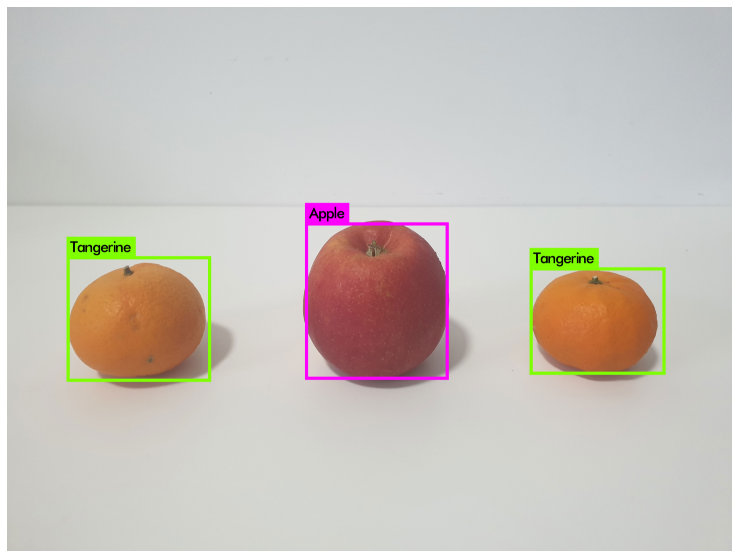

In [ ]:
!./darknet detector test custom/custom_data.data custom/custom-train-yolo.cfg backup/custom-train-yolo_final.weights data/fruit10.jpg -dont-show

imShow('predictions.jpg')